<h1><font color="blue">집합 연산과 최대값 찾기 
 </font></h1>

<h2><font color="red">색인의 집합 연산 
</font></h2>

<h3><font color="green"> 가전 제품 데이터
</font></h3>

<h6><font color="BlueViolet">1) 1번 파일 살펴 보기

</font></h6>

In [1]:
import pandas as pd
import numpy as np

In [3]:
homeapp01 = pd.read_csv('./../data/가전제품01.csv', index_col = '제품명', encoding='cp949')
homeapp01

,분기,일생산량,불량품
제품명,,,
미니오븐,1,85,24
전기밥솥,1,85,36
후라이팬,1,90,48
전자레인지,1,85,29
미니냉장고,1,65,19
선풍기,1,70,43


In [9]:
homeapp01idx=homeapp01.index
homeapp01idx

Index(['미니오븐', '전기밥솥', '후라이팬', '전자레인지', '미니냉장고', '선풍기'], dtype='object', name='제품명')

In [11]:
print(homeapp01idx.min())
print(homeapp01idx.max())
print(homeapp01idx.size)

미니냉장고
후라이팬
6


In [ ]:
# homeapp01idx[1] = '전기 밥솥'

In [15]:
newindex = homeapp01idx + '제품'
homeapp01.index = newindex
homeapp01

,분기,일생산량,불량품
제품명,,,
미니오븐제품,1,85,24
전기밥솥제품,1,85,36
후라이팬제품,1,90,48
전자레인지제품,1,85,29
미니냉장고제품,1,65,19
선풍기제품,1,70,43


In [16]:
result = homeapp01idx > '자'
result

array([False,  True,  True,  True, False, False])

In [17]:
homeapp01[result]

,분기,일생산량,불량품
제품명,,,
전기밥솥제품,1,85,36
후라이팬제품,1,90,48
전자레인지제품,1,85,29


In [5]:
home01idx[1]

'전기밥솥'

In [6]:
home01idx[[0,2]]

Index(['미니오븐', '후라이팬'], dtype='object', name='제품명')

<h6><font color="BlueViolet">2) 2번 파일 살펴 보기

</font></h6>

In [29]:
homeapp02 = pd.read_csv('./../data/가전제품02.csv', index_col = '제품명', encoding='cp949')
homeapp02

,분기,일생산량,불량품
제품명,,,
미니오븐,2,85,26
전기밥솥,2,70,39
믹서기,2,85,39
전자레인지,2,90,22
미니냉장고,2,90,22
선풍기,2,65,33


In [30]:
homeapp02idx = homeapp02.index
homeapp02idx

Index(['미니오븐', '전기밥솥', '믹서기', '전자레인지', '미니냉장고', '선풍기'], dtype='object', name='제품명')

In [21]:
print(homeapp01idx)

Index(['미니오븐', '전기밥솥', '후라이팬', '전자레인지', '미니냉장고', '선풍기'], dtype='object', name='제품명')


<h3><font color="green">색인의 집합 연산
</font></h3>

In [33]:
# 합집합

homeapp01idx.union(homeapp02idx)

Index(['미니냉장고', '미니오븐', '믹서기', '선풍기', '전기밥솥', '전자레인지', '후라이팬'], dtype='object', name='제품명')

In [27]:
# 교집합
homeapp01idx.intersection(homeapp02idx)

Index(['미니오븐', '전기밥솥', '전자레인지', '미니냉장고', '선풍기'], dtype='object', name='제품명')

In [34]:
# 차집합
homeapp01idx.difference(homeapp02idx)

Index(['후라이팬'], dtype='object', name='제품명')

In [35]:
# 두 차집합의 합집합
homeapp01idx.symmetric_difference(homeapp02idx)

Index(['믹서기', '후라이팬'], dtype='object', name='제품명')

<h2><font color="red">색인의 참조 복사와 값 복사 
 
</font></h2>

<h3><font color="green"> 출장 내역 데이터
</font></h3>

<h6><font color="BlueViolet">1) 참조 복사와 값 복사
</font></h6>

In [36]:
payment = pd.read_csv('./../data/payment06.csv', index_col = '사원명', encoding='cp949')
payment

,출장지역,교통비
사원명,,
윤장혁,서울,4000
서문덕,서울,2000
이성진,부산,3000
강찬혁,부산,1000


In [38]:
# 참조 복사
traffic01 = payment['교통비']
traffic01.to_frame()

,교통비
사원명,
윤장혁,4000
서문덕,2000
이성진,3000
강찬혁,1000


In [39]:
traffic02 = payment['교통비']
traffic02.to_frame()

,교통비
사원명,
윤장혁,4000
서문덕,2000
이성진,3000
강찬혁,1000


In [40]:
traffic01 is traffic02

True

In [ ]:
# 값 복사

In [41]:
traffic01 = payment['교통비'].copy()
traffic01.to_frame()

,교통비
사원명,
윤장혁,4000
서문덕,2000
이성진,3000
강찬혁,1000


In [42]:
traffic02 = payment['교통비'].copy()
traffic02.to_frame()

,교통비
사원명,
윤장혁,4000
서문덕,2000
이성진,3000
강찬혁,1000


In [43]:
traffic01 is traffic02

False

In [44]:
traffic01 = traffic01.sort_index()
traffic01.to_frame()

,교통비
사원명,
강찬혁,1000
서문덕,2000
윤장혁,4000
이성진,3000


In [45]:
traffic02.to_frame()

,교통비
사원명,
윤장혁,4000
서문덕,2000
이성진,3000
강찬혁,1000


<h2><font color="red">특정 그룹 별 최대 값 찾기 
</font></h2>

<h3><font color="green"> 가전 제품 데이터
</font></h3>

In [47]:
homeapp = pd.read_csv('./../data/가전제품.csv', encoding='cp949')
homeapp.head()

,제품명,분기,일생산량,생산일수,총생산량,불량품,출고량
0,미니오븐,1,85,20,6000,24,50
1,전기밥솥,1,85,25,9000,36,80
2,믹서기,1,90,25,12000,48,80
3,전자레인지,1,85,25,7200,29,50
4,미니냉장고,1,65,25,4800,19,65


<h6><font color="BlueViolet">1) 가전 제품별 최대 값 구하기
</font></h6>

In [48]:
name_qty = homeapp[['제품명','총생산량']]
name_qty.head(10)

,제품명,총생산량
0,미니오븐,6000
1,전기밥솥,9000
2,믹서기,12000
3,전자레인지,7200
4,미니냉장고,4800
5,선풍기,10800
6,미니오븐,4960
7,전기밥솥,11160
8,믹서기,12800
9,전자레인지,7680


In [49]:
# ascending True:오름차 / False:내림차
name_qty = name_qty.sort_values(['제품명','총생산량'], ascending=[True,False]) 
name_qty.head(10)

,제품명,총생산량
16,미니냉장고,12400
10,미니냉장고,5120
22,미니냉장고,4960
4,미니냉장고,4800
12,미니오븐,6200
18,미니오븐,6200
0,미니오븐,6000
6,미니오븐,4960
8,믹서기,12800
14,믹서기,12400


In [50]:
# 중복(duplicates) 제거하고 1 개만 보여 주기 : drop_duplicates(subset='컬럼_이름')
max_value = name_qty.drop_duplicates(subset = '제품명')
max_value

,제품명,총생산량
16,미니냉장고,12400
12,미니오븐,6200
8,믹서기,12800
11,선풍기,11520
7,전기밥솥,11160
21,전자레인지,9600


In [52]:
max_value = max_value.set_index('제품명')
max_value

,총생산량
제품명,
미니냉장고,12400
미니오븐,6200
믹서기,12800
선풍기,11520
전기밥솥,11160
전자레인지,9600


In [55]:
chartdata01 = max_value.copy().sort_values(by='총생산량', ascending=False)
chartdata01

,총생산량
제품명,
믹서기,12800
미니냉장고,12400
선풍기,11520
전기밥솥,11160
전자레인지,9600
미니오븐,6200


In [53]:
import matplotlib.pyplot as plt
plt.rc('font', family='malgun Gothic')

Text(0.5, 1.0, '제품별 총생산량 최대 값')

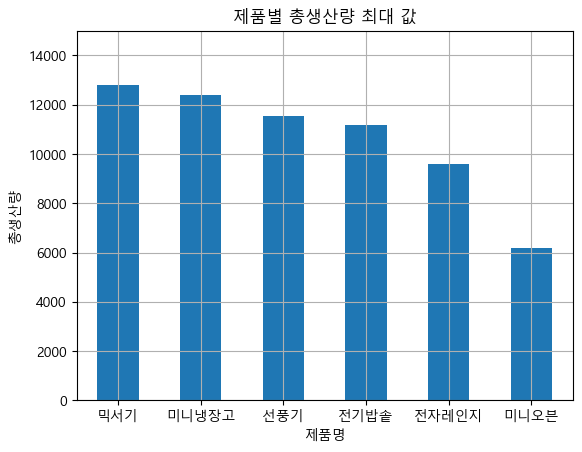

In [59]:
chartdata01.plot(kind='bar', rot=0 , use_index=True, grid=True, legend=False, \
                 ylim=[0, 15000], table=False)
plt.xlabel('제품명')
plt.ylabel('총생산량')
plt.title('제품별 총생산량 최대 값')

In [60]:
# 원본 DataFrame에 최대 값 열 생성
homeapp = homeapp.set_index('제품명')
homeapp.head(10)

,분기,일생산량,생산일수,총생산량,불량품,출고량
제품명,,,,,,
미니오븐,1,85,20,6000,24,50
전기밥솥,1,85,25,9000,36,80
믹서기,1,90,25,12000,48,80
전자레인지,1,85,25,7200,29,50
미니냉장고,1,65,25,4800,19,65
선풍기,1,70,25,10800,43,55
미니오븐,2,85,20,4960,26,55
전기밥솥,2,70,20,11160,39,65
믹서기,2,85,25,12800,39,80


In [61]:
pd.options.display.max_columns = 10
homeapp['총생산량_최대값'] = max_value['총생산량']
homeapp.head(10)

,분기,일생산량,생산일수,총생산량,불량품,출고량,총생산량_최대값
제품명,,,,,,,
미니오븐,1,85,20,6000,24,50,6200
전기밥솥,1,85,25,9000,36,80,11160
믹서기,1,90,25,12000,48,80,12800
전자레인지,1,85,25,7200,29,50,9600
미니냉장고,1,65,25,4800,19,65,12400
선풍기,1,70,25,10800,43,55,11520
미니오븐,2,85,20,4960,26,55,6200
전기밥솥,2,70,20,11160,39,65,11160
믹서기,2,85,25,12800,39,80,12800


In [63]:
homeapp['rate'] = 100 * homeapp['총생산량'] / homeapp['총생산량_최대값']
homeapp.head(10)

,분기,일생산량,생산일수,총생산량,불량품,출고량,총생산량_최대값,rate
제품명,,,,,,,,
미니오븐,1,85,20,6000,24,50,6200,96.774194
전기밥솥,1,85,25,9000,36,80,11160,80.645161
믹서기,1,90,25,12000,48,80,12800,93.750000
전자레인지,1,85,25,7200,29,50,9600,75.000000
미니냉장고,1,65,25,4800,19,65,12400,38.709677
선풍기,1,70,25,10800,43,55,11520,93.750000
미니오븐,2,85,20,4960,26,55,6200,80.000000
전기밥솥,2,70,20,11160,39,65,11160,100.000000
믹서기,2,85,25,12800,39,80,12800,100.000000


In [64]:
homeapp.sort_index().head(10)

,분기,일생산량,생산일수,총생산량,불량품,출고량,총생산량_최대값,rate
제품명,,,,,,,,
미니냉장고,1,65,25,4800,19,65,12400,38.709677
미니냉장고,3,90,25,12400,17,75,12400,100.000000
미니냉장고,2,90,25,5120,22,60,12400,41.290323
미니냉장고,4,85,20,4960,17,50,12400,40.000000
미니오븐,1,85,20,6000,24,50,6200,96.774194
미니오븐,4,80,25,6200,47,80,6200,100.000000
미니오븐,2,85,20,4960,26,55,6200,80.000000
미니오븐,3,95,20,6200,31,65,6200,100.000000
믹서기,4,80,25,6400,43,95,12800,50.000000


In [65]:
homeapp.query('총생산량 > 총생산량_최대값')

,분기,일생산량,생산일수,총생산량,불량품,출고량,총생산량_최대값,rate
제품명,,,,,,,,


<h2><font color="red">열마다 최대 값을 가지는 행 정보 찾기 

</font></h2>

<h3><font color="green"> 개인 신상 데이터

</font></h3>

In [2]:
likelyhood = pd.read_csv('./../data/likelyhood03.csv' , index_col = 'name' , encoding = 'cp949')
likelyhood

,muscle,height,grade,gender,marriage
name,,,,,
김구,70,50,40,M,1
이순신,60,70,90,M,1
신사임당,갑을,80,60,F,1
강감찬,90,병정,50,M,0
유관순,60,60,60,F,0


In [3]:
likelyhood.dtypes

muscle      object
height      object
grade        int64
gender      object
marriage     int64
dtype: object

In [4]:
likelyhood.muscle.value_counts()

60    2
70    1
갑을    1
90    1
Name: muscle, dtype: int64

In [9]:
likelyhood['muscle'] = pd.to_numeric(likelyhood.muscle, errors='coerce')
likelyhood['height'] = pd.to_numeric(likelyhood.height, errors='coerce')

In [10]:
likelyhood

,muscle,height,grade,gender,marriage
name,,,,,
김구,70.0,50.0,40,M,1
이순신,60.0,70.0,90,M,1
신사임당,NaN,80.0,60,F,1
강감찬,90.0,NaN,50,M,0
유관순,60.0,60.0,60,F,0


In [11]:
likelyhood.dtypes

muscle      float64
height      float64
grade         int64
gender       object
marriage      int64
dtype: object

In [12]:
likelyhood.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 김구 to 유관순
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   muscle    4 non-null      float64
 1   height    4 non-null      float64
 2   grade     5 non-null      int64  
 3   gender    5 non-null      object 
 4   marriage  5 non-null      int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 240.0+ bytes


In [15]:
likelyhood_numeric = likelyhood.select_dtypes(include=[np.number])
likelyhood_numeric

,muscle,height,grade,marriage
name,,,,
김구,70.0,50.0,40,1
이순신,60.0,70.0,90,1
신사임당,NaN,80.0,60,1
강감찬,90.0,NaN,50,0
유관순,60.0,60.0,60,0


In [16]:
likelyhood_numeric.nunique()

muscle      3
height      4
grade       4
marriage    2
dtype: int64

In [18]:
criteria = likelyhood_numeric.nunique() == 2
criteria

muscle      False
height      False
grade       False
marriage     True
dtype: bool

In [21]:
dropped_columns = likelyhood_numeric.columns[criteria].tolist()
dropped_columns # 제거된 열 리스트

['marriage']

In [23]:
numeric_cols = likelyhood_numeric.drop(labels=dropped_columns, axis = 'columns')
numeric_cols

,muscle,height,grade
name,,,
김구,70.0,50.0,40
이순신,60.0,70.0,90
신사임당,NaN,80.0,60
강감찬,90.0,NaN,50
유관순,60.0,60.0,60


In [25]:
max_columns = numeric_cols.idxmax()
max_columns

muscle     강감찬
height    신사임당
grade      이순신
dtype: object

In [26]:
unique_max = max_columns.unique()
unique_max

array(['강감찬', '신사임당', '이순신'], dtype=object)

In [27]:
numeric_cols.loc[unique_max]

,muscle,height,grade
name,,,
강감찬,90.0,NaN,50
신사임당,NaN,80.0,60
이순신,60.0,70.0,90


In [ ]:
# Test
'''
색인의 참조 복사와 값 복사   
   '가전제품02.csv' 파일에 대하여 참조 복사 및 값 복사를 테스트 해보세요.
   '참조 복사'를 하면 1번째 파일이 변경되면 2번째 파일도 변경된 결과를 보여 줘야 합니다.
   '값 복사'를 하면 1번째 파일 변경되어도 2번째 파일에는 영향이 없어야 합니다.
'''

In [31]:
homeapp02

,분기,일생산량,불량품
제품명,,,
미니오븐,2,85,26
전기밥솥,2,70,39
믹서기,2,85,39
전자레인지,2,90,22
미니냉장고,2,90,22
선풍기,2,65,33
